## Enriquecimento de Leads – Quark Investimentos

### 🎯 Objetivo

Este notebook tem como objetivo cruzar e enriquecer uma base de CNPJs adquirida pela **Quark Investimentos** com dados públicos da Receita Federal do Brasil (RFB), previamente organizados e estruturados em uma visão analítica (`view_lead_prequalificados_total`) e base comprada (`view_lead_prequalificados_total`)hospedada no Google BigQuery.

Com isso, buscamos:

- ✅ Identificar quais CNPJs da base comprada existem na base oficial da RFB (~98%)
- ✅ Adicionar colunas relevantes como razão social, capital social, idade da empresa, CNAE, UF, município, presença de telefone/email, etc.
- ✅ Marcar na base oficial da RFB quais empresas foram adquiridas na base da Quark (flag `MATCH`)
- ✅ Realizar análises comparativas entre empresas compradas e não compradas
- ✅ Avaliar a qualidade, distribuição e perfil dos leads adquiridos
- ✅ Produzir insights úteis para qualificação comercial, prospecção e segmentação

---

## 📁 Fontes de Dados ja enriquecidos

- **Base Pública RFB (via BigQuery):**
  - SELECT * FROM `silent-text-458716-c9.cnpj_dados_rfb.view_lead_prequalificados_total` com informações tratadas e calculadas (situação cadastral, porte, capital, CNAE, etc.)

- **Base Comprada pela Quark:**
  - Arquivo SELECT * FROM `silent-text-458716-c9.cnpj_dados_rfb.view_quark_enriquecida_rfb`  com CNPJs adquiridos de terceiros para prospecção
  

---

## 🔧 Etapas do Notebook

1. Importação via bigquery da visão analítica da RFB via BigQuery e Base comprada quark enriquecida
2. salvar arquivos em parquet `quark_leads/`
4. Análises exploratórias:
   - Distribuição geográfica, CNAE, porte e capital
   - Avaliação de cobertura e match dos dados
   - Qualidade dos dados de contato
   - analises visuais e estatisticas 
5. Exportação das duas base enriquecida

---

## 🧮 Tecnologias

- Python 3
- Pandas
- Google Cloud BigQuery
- PyArrow


---
Licença
Uso interno / corporativo – dados públicos com enriquecimento privado. Consulte as regras de uso dos dados abertos da Receita Federal.

Importar a view do BigQuery para o VS Code (Após ETL)

- Váriaveis de ambiente
- Importações
- Configuração do Pandas
- Carregar os dados
- Análise exploratória
- Análise de clusterização
- Outputs arquivos (Base Quark e Leads Pré Qualificados)

In [61]:
import os
from google.cloud import bigquery
import pandas as pd

# Configurar variáveis de ambiente
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/ericobon/projetos/insightesfera/multiagent-platform/gcp-service-account.json"
os.environ["GOOGLE_CLOUD_PROJECT"] = "silent-text-458716-c9"

# Inicializar cliente BigQuery
client = bigquery.Client()

In [ ]:
i# Criar diretório de exportação local, caso não exista
export_dir = 'dados_bq'
os.makedirs(export_dir, exist_ok=True)

# Definir o caminho local para os arquivos Parquet
quark_parquet_path = os.path.join(export_dir, 'quark_leads_enriquecidos.parquet')
leads_prequalificados_parquet_path = os.path.join(export_dir, 'leads_prequalificados.parquet')

# SQL para consulta na base comprada (Quark)
query_quark_enriquecida = """
SELECT * 
FROM `silent-text-458716-c9.cnpj_dados_rfb.view_quark_enriquecida_rfb`
"""

# SQL para consulta na base de leads pré qualificados
query_lead_prequalificados = """
SELECT * 
FROM `silent-text-458716-c9.cnpj_dados_rfb.view_lead_prequalificados_total`
"""

# Executar as consultas e carregar os dados em DataFrames
quark_leads_df = client.query(query_quark_enriquecida).to_dataframe()
leads_prequalificados_df = client.query(query_lead_prequalificados).to_dataframe()

# Salvar os dados como Parquet localmente
quark_leads_df.to_parquet(quark_parquet_path, engine='pyarrow')
leads_prequalificados_df.to_parquet(leads_prequalificados_parquet_path, engine='pyarrow')

print(f"✅ Dados da base Quark exportados com sucesso para {quark_parquet_path}")
print(f"✅ Dados da base de Leads Pré Qualificados exportados com sucesso para {leads_prequalificados_parquet_path}")


NameError: name 'i' is not defined

### Bibliotecas

In [ ]:
import os
from google.cloud import bigquery
import pandas as pd


### Carregar Dataframes parquet

In [ ]:
leads_prequalificados_df = pd.read_parquet('dados/leads_prequalificados.parquet')
quark_leads_df = pd.read_parquet('dados/quark_leads_enriquecidos.parquet')

### Amostra Dataframes

In [ ]:
# Ajustar a configuração do Pandas para mostrar todas as colunas e seus tipos de dados
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.max_rows', None)  # Exibir todas as linhas (ou pelo menos até a quantidade total de colunas)
# Exibir as primeiras linhas de ambas as bases
print("✅ Dados da base Quark Leads:")
quark_leads_df.head()

✅ Dados da base Quark Leads:


,unnamed_0,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_socio,nome_socio,cnpj_cpf_socio,cod_qualificacao_socio,percentual_capital_socio,data_entrada_sociedade,cod_pais,nome_pais_socio,cpf_representante_legal,nome_representante,cod_qualificacao_representante_legal,fillter,fim_registro,ano_entrada,mes_entrada,cnpj_limpo,tipo_socio,cnpj_basico,razao_social,natureza_juridica,natureza_juridica_desc,capital_social_original,capital_social_valor,porte_empresa,porte_desc,faixa_capital,cnpj_completo,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nome_cidade_exterior,pais,data_inicio_atividade,cnae_fiscal_principal,cnae_principal_desc,cnae_fiscal_secundaria,tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,municipio,municipio_desc,cidade_uf,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,endereco_completo,ano_inicio_atividade,mes_inicio_atividade,anos_atividade,tem_email,tem_telefone,tem_nome_fantasia,opcao_pelo_simples,opcao_mei,tipo_match
0,12826303,2,F,None,12282000000100,2,JOUBERT BRANDAO MASCARENHAS,***946834**,49,0,1958-01-22,None,None,***000000**,CPF INVALIDO,0,None,F,1958,1,12282000000100,Pessoa Física,12282000,OSMAN MASCARENHAS COMERCIO E INDUSTRIA LIMITADA,2062,Sociedade Empresária Limitada,"0,00",0.0,01,ME,MICRO,12282000000100,1,SPAZIO,04,20240814,63,,,19660926,4511102,"Comércio a varejo de automóveis, camionetas e ...",,RUA,SANTA FERNANDA,232,APTO. 704,JATIUCA,57035670,AL,2785,MACEIO,MACEIO / AL,82,30337931,,,,,,,,"RUA SANTA FERNANDA, 232 APTO. 704 - JATIUCA - ...",1966,9,59,NÃO,SIM,SIM,N,N,MATCH_CNPJ_COMPLETO
1,12840169,2,F,None,12305033000129,2,ILSON BASILIO DA SILVA,***844364**,49,0,1969-01-15,None,None,***000000**,CPF INVALIDO,0,None,F,1969,1,12305033000129,Pessoa Física,12305033,ETEC - EQUIPE TECNICA CONTABIL S/S,2232,Sociedade Simples Pura,"83400,00",83400.0,03,EPP,PEQUENO,12305033000129,1,ETEC,02,20051103,00,,,19690115,6920601,Atividades de contabilidade,6920602,AVENIDA,MENINO MARCELO,9350,SALA 1517 15 ANDAR EDIF EMPRESARIAL H ...,SERRARIA,57046000,AL,2785,MACEIO,MACEIO / AL,82,32213808,,,82,32214538,ETEC@UOL.COM.BR,,,"AVENIDA MENINO MARCELO, 9350 SALA 1517 15 AND...",1969,1,56,SIM,SIM,SIM,N,N,MATCH_CNPJ_COMPLETO
2,12766531,2,F,None,12159745000187,2,RONALDO ALADIO CANSANCAO,***595024**,49,0,1972-01-21,None,None,***000000**,CPF INVALIDO,0,None,F,1972,1,12159745000187,Pessoa Física,12159745,C R MELRO CANSANCAO LTDA,2062,Sociedade Empresária Limitada,"0,00",0.0,01,ME,MICRO,12159745000187,1,,02,20190930,00,,,19720125,4731800,Comércio varejista de combustíveis para veícul...,4732600,RUA,BUARQUE DE MACEDO,807,,CENTRO,57020520,AL,2785,MACEIO,MACEIO / AL,,,,,,,,,,"RUA BUARQUE DE MACEDO, 807 - CENTRO - MACEIO/...",1972,1,53,NÃO,NÃO,NÃO,N,N,MATCH_CNPJ_COMPLETO
3,12774512,2,F,None,12186367000120,2,GLAUCO MONTEIRO CAVALCANTI MANSO,***429634**,49,0,1973-01-05,None,None,***000000**,CPF INVALIDO,0,None,F,1973,1,12186367000120,Pessoa Física,12186367,HOSPITAL ORTOPEDICO DE MACEIO,2240,Sociedade Simples Limitada,"0,00",0.0,03,EPP,MICRO,12186367000120,1,,02,20050924,00,,,19730105,8610101,"Atividades de atendimento hospitalar, exceto p...",,RUA,ANGELO NETO,194,SALAS,FAROL,57036540,AL,2785,MACEIO,MACEIO / AL,,,,,,,,,,"RUA ANGELO NETO, 194 SALAS - FAROL - MACEIO/AL...",1973,1,52,NÃO,NÃO,NÃO,N,N,MATCH_CNPJ_COMPLETO
4,12774416,2,F,None,12186243000145,2,JUVENAL COELHO VASCONCELOS,***197364**,49,0,1973-01-29,None,None,***000000**,CPF INVALIDO,0,None,F,1973,1,12186243000145,Pessoa Física,12186243,G LAMENHA CIA LTDA,2062,Sociedade Empresária Limitada,"0,00",0.0,05,DEMAIS,MICRO,12186243000145,1,SERRARIA SANTA LUZIA,08,20170519,67,,,19730129,1610203,Serrarias com desdobramento de madeira em bruto,,RUA,EM PROJETO,70,GALPAO,TAB MARTINS,57036540,AL,2785,MACEIO,MACEIO / AL,,,,,,,,,,"RUA EM PROJETO, 70 GALPAO - TAB MARTINS - MACE...",1973,1,52,NÃO,NÃO,SIM,N,N,MATCH_CNPJ_COMPLETO


In [77]:
print("✅ Dados da base Leads Pré Qualificados:")
leads_prequalificados_df.head()

✅ Dados da base Leads Pré Qualificados:


,cnpj_basico,razao_social,natureza_juridica,natureza_juridica_desc,capital_social_original,capital_social_valor,porte_empresa,porte_desc,faixa_capital,cnpj_completo,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nome_cidade_exterior,pais,data_inicio_atividade,cnae_fiscal_principal,cnae_principal_desc,cnae_fiscal_secundaria,tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,municipio,municipio_desc,cidade_uf,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,endereco_completo,ano_inicio_atividade,mes_inicio_atividade,anos_atividade,tem_email,tem_telefone,tem_nome_fantasia,opcao_pelo_simples,opcao_mei,cluster_semantico
0,19449814,APIACAS ENGENHARIA LTDA,2062,Sociedade Empresária Limitada,"12450000,00",12450000.0,05,DEMAIS,GRANDE,19449814000136,1,,02,2013-12-26,00,,,2013-12-26,4221901,Construção de barragens e represas para geraçã...,4299599,RUA,PAULO FREIRE DE ARAUJO,68,SALA 11,ESTORIL,30494280,MG,4123,BELO HORIZONTE,BELO HORIZONTE / MG,31,91503114,,,,,COMUNICACAO@QUEBECENGENHARIA.COM.BR,,NaT,"RUA PAULO FREIRE DE ARAUJO, 68 SALA 11 - ESTO...",2013,12,12,True,True,False,False,False,exceto
1,10822373,MICALET PARTICIPACOES E EMPREENDIMENTOS LTDA.,2062,Sociedade Empresária Limitada,"2590000,00",2590000.0,05,DEMAIS,GRANDE,10822373000100,1,,02,2009-04-29,00,,,2009-04-29,6462000,Holdings de instituições não-financeiras,"4110700,4723700,4729699,6463800,6810201,6810202",AVENIDA,IRAI,75,ANDAR 15 CONJ 155-B ...,INDIANOPOLIS,04082000,SP,7107,SAO PAULO,SAO PAULO / SP,11,55333681,11,46612414,11,55333681,paisanoltda@terra.com.br,,NaT,"AVENIDA IRAI, 75 ANDAR 15 CON...",2009,4,16,True,True,False,False,False,comércio
2,14873068,EMC EMPREENDIMENTOS E PARTICIPACOES LTDA,2062,Sociedade Empresária Limitada,"9110602,00",9110602.0,03,EPP,GRANDE,14873068000190,1,,02,2012-01-02,00,,,2012-01-02,6810202,Aluguel de imóveis próprios,"6462000,6810201,7020400,7740300",AVENIDA,PRIMEIRA AVENIDA,SN,QUADRA1B LOTE 28 ...,CIDADE VERA CRUZ COND EMPRESARIAL VILLAGE,74934600,GO,9227,APARECIDA DE GOIANIA,APARECIDA DE GOIANIA / GO,62,81296699,,,62,30930438,CUNHAMONICA@HOTMAIL.COM,,NaT,"AVENIDA PRIMEIRA AVENIDA, SN QUADRA1B ...",2012,1,13,True,True,False,False,False,exceto
3,17976379,LUANDA EMPREENDIMENTOS IMOBILIARIOS LTDA,2062,Sociedade Empresária Limitada,"39434273,00",39434273.0,05,DEMAIS,GRANDE,17976379000172,1,,02,2013-04-22,00,,,2013-04-22,6810201,Compra e venda de imóveis próprios,"6810202,4110700,6463800",RUA,DO ROCIO,109,ANDAR 3 SALA 01 ...,VILA OLIMPIA,04552000,SP,7107,SAO PAULO,SAO PAULO / SP,11,38397084,,,,,DEPTODETRIBUTOS@CYRELA.COM.BR,,NaT,"RUA DO ROCIO, 109 ANDAR 3 SA...",2013,4,12,True,True,False,False,False,comércio
4,17976379,LUANDA EMPREENDIMENTOS IMOBILIARIOS LTDA,2062,Sociedade Empresária Limitada,"39434273,00",39434273.0,05,DEMAIS,GRANDE,17976379000253,2,,02,2014-04-09,00,,,2014-04-09,6810201,Compra e venda de imóveis próprios,"6810202,4110700,6463800",AVENIDA,DAS AMERICAS,02480,BLC 1 COB 308,BARRA DA TIJUCA,22640101,RJ,6001,RIO DE JANEIRO,RIO DE JANEIRO / RJ,11,38397010,11,38397020,,,DEPTODETRIBUTOS@CYRELA.COM.BR,,NaT,"AVENIDA DAS AMERICAS, 02480 BLC 1 COB 30...",2014,4,11,True,True,False,False,False,comércio


## 1. Data Wrangling

#### Verificar Tipo de Dados

In [64]:
# Ajustar a configuração do Pandas para mostrar todas as colunas e suas informações sem truncar
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.max_rows', None)  # Exibir todas as linhas

# Exibir os tipos de dados na base Quark Leads
print("🔍 Tipos de dados na base Quark Leads:")
print(quark_leads_df.dtypes)

# Exibir as primeiras linhas da base Quark Leads para checar as colunas
print("🔍 Colunas na base Quark Leads:")
print(quark_leads_df.columns)

# Exibir os tipos de dados na base Leads Pré Qualificados
print("🔍 Tipos de dados na base Leads Pré Qualificados:")
print(leads_prequalificados_df.dtypes)

# Exibir as primeiras linhas da base Leads Pré Qualificados para checar as colunas
print("🔍 Colunas na base Leads Pré Qualificados:")
print(leads_prequalificados_df.columns)


🔍 Tipos de dados na base Quark Leads:
unnamed_0                                 Int64
tipo_de_registro                         object
indicador                                object
tipo_atualizacao                         object
cnpj                                     object
identificador_socio                      object
nome_socio                               object
cnpj_cpf_socio                           object
cod_qualificacao_socio                   object
percentual_capital_socio                 object
data_entrada_sociedade                   object
cod_pais                                 object
nome_pais_socio                          object
cpf_representante_legal                  object
nome_representante                       object
cod_qualificacao_representante_legal     object
fillter                                  object
fim_registro                             object
ano_entrada                              object
mes_entrada                              object
cn

### Correção de Tipos de Dados e Remoção de Coluna

In [65]:
# Corrigir tipos de dados na base Quark Leads
quark_leads_df = quark_leads_df.drop(columns=['unnamed_0'], errors='ignore')
quark_leads_df['capital_social_valor'] = pd.to_numeric(quark_leads_df['capital_social_valor'], errors='coerce')
quark_leads_df['tem_telefone'] = quark_leads_df['tem_telefone'].map({'SIM': True, 'NÃO': False}).astype(bool)
quark_leads_df['tem_email'] = quark_leads_df['tem_email'].map({'SIM': True, 'NÃO': False}).astype(bool)
quark_leads_df['tem_nome_fantasia'] = quark_leads_df['tem_nome_fantasia'].map({'SIM': True, 'NÃO': False}).astype(bool)
quark_leads_df['opcao_pelo_simples'] = quark_leads_df['opcao_pelo_simples'].map({'S': True, 'N': False}).astype(bool)
quark_leads_df['opcao_mei'] = quark_leads_df['opcao_mei'].map({'S': True, 'N': False}).astype(bool)

# Converter CNPJ e outras colunas como strings
quark_leads_df['cnpj_basico'] = quark_leads_df['cnpj_basico'].astype(str)
quark_leads_df['cnpj_completo'] = quark_leads_df['cnpj_completo'].astype(str)

# Corrigir as colunas de data para datetime
quark_leads_df['data_inicio_atividade'] = pd.to_datetime(quark_leads_df['data_inicio_atividade'], errors='coerce')
quark_leads_df['data_situacao_cadastral'] = pd.to_datetime(quark_leads_df['data_situacao_cadastral'], errors='coerce')
quark_leads_df['data_situacao_especial'] = pd.to_datetime(quark_leads_df['data_situacao_especial'], errors='coerce')

# Corrigir tipos de dados na base Leads Pré Qualificados
leads_prequalificados_df = leads_prequalificados_df.drop(columns=['unnamed_0'], errors='ignore')
leads_prequalificados_df['tem_telefone'] = leads_prequalificados_df['tem_telefone'].map({'SIM': True, 'NÃO': False}).astype(bool)
leads_prequalificados_df['tem_email'] = leads_prequalificados_df['tem_email'].map({'SIM': True, 'NÃO': False}).astype(bool)
leads_prequalificados_df['tem_nome_fantasia'] = leads_prequalificados_df['tem_nome_fantasia'].map({'SIM': True, 'NÃO': False}).astype(bool)
leads_prequalificados_df['opcao_pelo_simples'] = leads_prequalificados_df['opcao_pelo_simples'].map({'S': True, 'N': False}).astype(bool)
leads_prequalificados_df['opcao_mei'] = leads_prequalificados_df['opcao_mei'].map({'S': True, 'N': False}).astype(bool)

# Converter CNPJ e outras colunas como strings
leads_prequalificados_df['cnpj_basico'] = leads_prequalificados_df['cnpj_basico'].astype(str)
leads_prequalificados_df['cnpj_completo'] = leads_prequalificados_df['cnpj_completo'].astype(str)

# Corrigir as colunas de data para datetime
leads_prequalificados_df['data_inicio_atividade'] = pd.to_datetime(leads_prequalificados_df['data_inicio_atividade'], errors='coerce')
leads_prequalificados_df['data_situacao_cadastral'] = pd.to_datetime(leads_prequalificados_df['data_situacao_cadastral'], errors='coerce')
leads_prequalificados_df['data_situacao_especial'] = pd.to_datetime(leads_prequalificados_df['data_situacao_especial'], errors='coerce')

# Verificar os tipos de dados novamente
print("🔍 Tipos de dados corrigidos na base Quark Leads:")
print(quark_leads_df.dtypes)

print("🔍 Tipos de dados corrigidos na base Leads Pré Qualificados:")
print(leads_prequalificados_df.dtypes)

🔍 Tipos de dados corrigidos na base Quark Leads:
tipo_de_registro                                object
indicador                                       object
tipo_atualizacao                                object
cnpj                                            object
identificador_socio                             object
nome_socio                                      object
cnpj_cpf_socio                                  object
cod_qualificacao_socio                          object
percentual_capital_socio                        object
data_entrada_sociedade                          object
cod_pais                                        object
nome_pais_socio                                 object
cpf_representante_legal                         object
nome_representante                              object
cod_qualificacao_representante_legal            object
fillter                                         object
fim_registro                                    object
ano_entrada     

### Descritivas features númericas

In [66]:
def descriptive_analysis(df, decimals=3):
    """
    Realiza análise descritiva em um DataFrame do pandas.
    :param df: DataFrame do pandas.
    :param decimals: Número de casas decimais para arredondamento.
    :return: DataFrame com estatísticas descritivas arredondadas.
    """
    # Verifica se a entrada é um DataFrame do pandas
    if not isinstance(df, pd.DataFrame):
        raise TypeError("A entrada deve ser um DataFrame do pandas")
    
    # Remover colunas que não devem ser incluídas na análise descritiva (ano_inicio_atividade, mes_inicio_atividade)
    df = df.drop(columns=['ano_inicio_atividade', 'mes_inicio_atividade'], errors='ignore')
    
    # Seleciona apenas colunas numéricas para análise
    numerical_cols = df.select_dtypes(include=['number'])
    
    # Calcula estatísticas descritivas para colunas numéricas
    descriptive_stats = numerical_cols.describe().T
    
    # Arredonda os valores para o número especificado de casas decimais
    descriptive_stats = descriptive_stats.round(decimals)
    
    return descriptive_stats

# Realizar análise descritiva com 3 casas decimais para as duas bases
quark_analysis_results = descriptive_analysis(quark_leads_df, decimals=3)
leads_analysis_results = descriptive_analysis(leads_prequalificados_df, decimals=3)

# Exibir os resultados
print("📊 Estatísticas Descritivas - Quark Leads:")
quark_analysis_results

📊 Estatísticas Descritivas - Quark Leads:


,count,mean,std,min,25%,50%,75%,max
capital_social_valor,44420.0,995339.048663,135740566.442503,0.0,10000.0,20000.0,50000.0,28100482141.0
anos_atividade,44420.0,15.760153,4.61061,15.0,15.0,15.0,15.0,86.0


In [67]:
print("📊 Estatísticas Descritivas - Leads Pré Qualificados:")
leads_analysis_results

📊 Estatísticas Descritivas - Leads Pré Qualificados:


,count,mean,std,min,25%,50%,75%,max
capital_social_valor,550789.0,4340542171.206342,19005736358.208988,1000000.0,2000000.0,7500000.0,120000000.0,800000000000.0
anos_atividade,550789.0,15.842889,12.868464,3.0,6.0,12.0,21.0,134.0


### Porte empresas por capital social

In [68]:
# Distribuição do Capital Social (faixa de capital) para Quark Leads
capital_distribution_quark = quark_leads_df['faixa_capital'].value_counts().reset_index()
capital_distribution_quark.columns = ['Faixa de Capital', 'Número de Empresas']
print("📊 Distribuição do Capital Social - Quark Leads:")
print(capital_distribution_quark)

# Distribuição do Capital Social (faixa de capital) para Leads Pré Qualificados
capital_distribution_leads = leads_prequalificados_df['faixa_capital'].value_counts().reset_index()
capital_distribution_leads.columns = ['Faixa de Capital', 'Número de Empresas']
print("📊 Distribuição do Capital Social - Leads Pré Qualificados:")
print(capital_distribution_leads)


📊 Distribuição do Capital Social - Quark Leads:
  Faixa de Capital  Número de Empresas
0          PEQUENO               28204
1            MICRO                8217
2            MÉDIO                6819
3           GRANDE                1180
📊 Distribuição do Capital Social - Leads Pré Qualificados:
  Faixa de Capital  Número de Empresas
0           GRANDE              550789


### Analise exploratória base comprada vs Receita Federal total Pré qualificados

/tmp/ipykernel_442629/2606666163.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_442629/2606666163.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/c/Users/Erico/OneDrive/AMBIENTE EMPRESA/projetos/insightesfera/ETL/CNPJ_RECEITA/venv_etl_clean/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


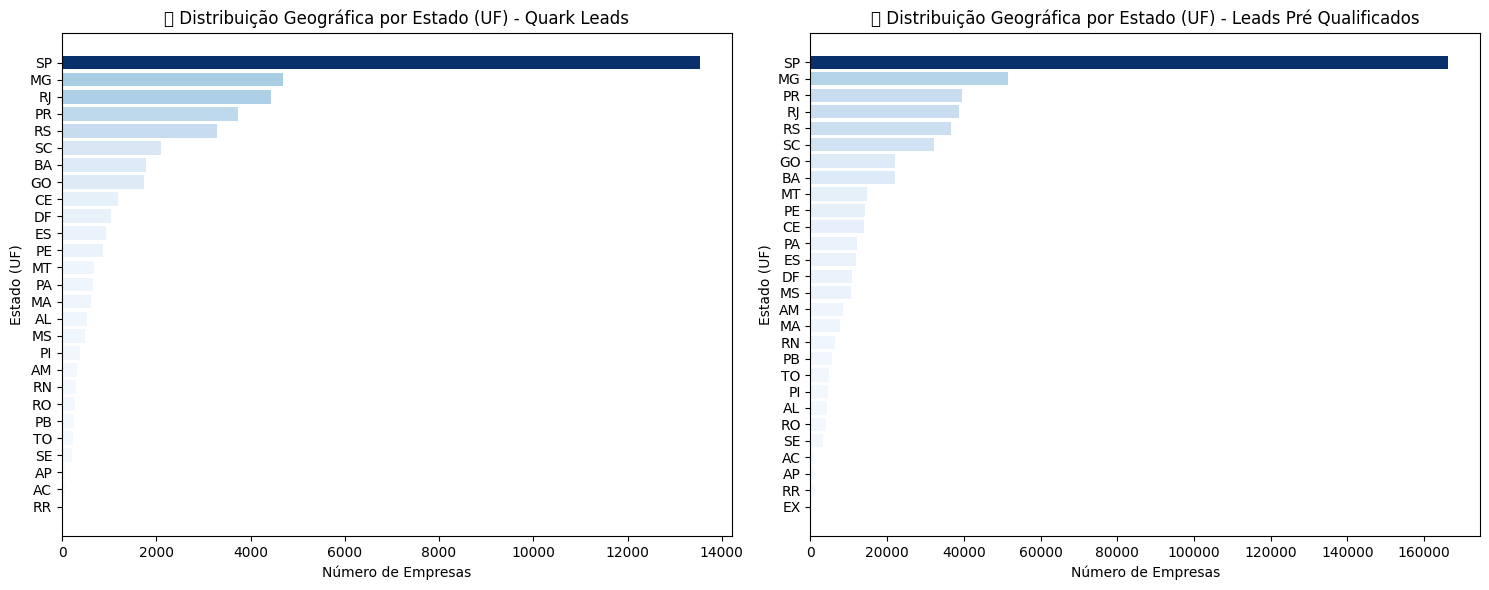

In [ ]:
import matplotlib.pyplot as plt

# Gráfico para a base Quark Leads
plt.figure(figsize=(15, 6))

# Subplot 1: Quark Leads
plt.subplot(1, 2, 1)
uf_distribution_quark = quark_leads_df['uf'].value_counts().reset_index()
uf_distribution_quark.columns = ['Estado (UF)', 'Número de Empresas']
uf_distribution_quark = uf_distribution_quark.sort_values('Número de Empresas', ascending=True)

plt.barh(uf_distribution_quark['Estado (UF)'], uf_distribution_quark['Número de Empresas'], color=plt.cm.Blues(uf_distribution_quark['Número de Empresas'] / max(uf_distribution_quark['Número de Empresas'])))
plt.title("📊 Distribuição Geográfica por Estado (UF) - Quark Leads")
plt.xlabel("Número de Empresas")
plt.ylabel("Estado (UF)")
plt.tight_layout()

# Subplot 2: Leads Pré Qualificados
plt.subplot(1, 2, 2)
uf_distribution_leads = leads_prequalificados_df['uf'].value_counts().reset_index()
uf_distribution_leads.columns = ['Estado (UF)', 'Número de Empresas']
uf_distribution_leads = uf_distribution_leads.sort_values('Número de Empresas', ascending=True)

plt.barh(uf_distribution_leads['Estado (UF)'], uf_distribution_leads['Número de Empresas'], color=plt.cm.Blues(uf_distribution_leads['Número de Empresas'] / max(uf_distribution_leads['Número de Empresas'])))
plt.title("📊 Distribuição Geográfica por Estado (UF) - Leads Pré Qualificados")
plt.xlabel("Número de Empresas")
plt.ylabel("Estado (UF)")
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [70]:
# Distribuição de dados de contato na base Quark Leads
contact_distribution_quark = quark_leads_df[['tem_telefone', 'tem_email']].sum().reset_index()
contact_distribution_quark.columns = ['Indicador de Contato', 'Número de Empresas']
print("📊 Distribuição de Contatos - Quark Leads:")
print(contact_distribution_quark)

# Distribuição de dados de contato na base Leads Pré Qualificados
contact_distribution_leads = leads_prequalificados_df[['tem_telefone', 'tem_email']].sum().reset_index()
contact_distribution_leads.columns = ['Indicador de Contato', 'Número de Empresas']
print("📊 Distribuição de Contatos - Leads Pré Qualificados:")
print(contact_distribution_leads)


📊 Distribuição de Contatos - Quark Leads:
  Indicador de Contato  Número de Empresas
0         tem_telefone               43824
1            tem_email               31497
📊 Distribuição de Contatos - Leads Pré Qualificados:
  Indicador de Contato  Número de Empresas
0         tem_telefone              519408
1            tem_email              462275


In [71]:
# Distribuição do regime tributário (Simples Nacional, MEI) na base Quark Leads
regime_tributario_quark = quark_leads_df[['opcao_pelo_simples', 'opcao_mei']].sum().reset_index()
regime_tributario_quark.columns = ['Regime Tributário', 'Número de Empresas']
print("📊 Distribuição do Regime Tributário - Quark Leads:")
print(regime_tributario_quark)

# Distribuição do regime tributário (Simples Nacional, MEI) na base Leads Pré Qualificados
regime_tributario_leads = leads_prequalificados_df[['opcao_pelo_simples', 'opcao_mei']].sum().reset_index()
regime_tributario_leads.columns = ['Regime Tributário', 'Número de Empresas']
print("📊 Distribuição do Regime Tributário - Leads Pré Qualificados:")
print(regime_tributario_leads)


📊 Distribuição do Regime Tributário - Quark Leads:
    Regime Tributário  Número de Empresas
0  opcao_pelo_simples               11297
1           opcao_mei                  34
📊 Distribuição do Regime Tributário - Leads Pré Qualificados:
    Regime Tributário  Número de Empresas
0  opcao_pelo_simples                   0
1           opcao_mei                   0


### Refinamento para Foco em Alta Renda

/tmp/ipykernel_442629/2692213802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distribution, x='Número de Empresas', y=column, ax=ax, palette='Blues_d')
/tmp/ipykernel_442629/2692213802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distribution, x='Número de Empresas', y=column, ax=ax, palette='Blues_d')
/tmp/ipykernel_442629/2692213802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distribution, x='Número de Empresas', y=column, ax=ax, palette='Blues_d')
/tmp/ipykernel_442629/2692213802.py:9: FutureWarning: 


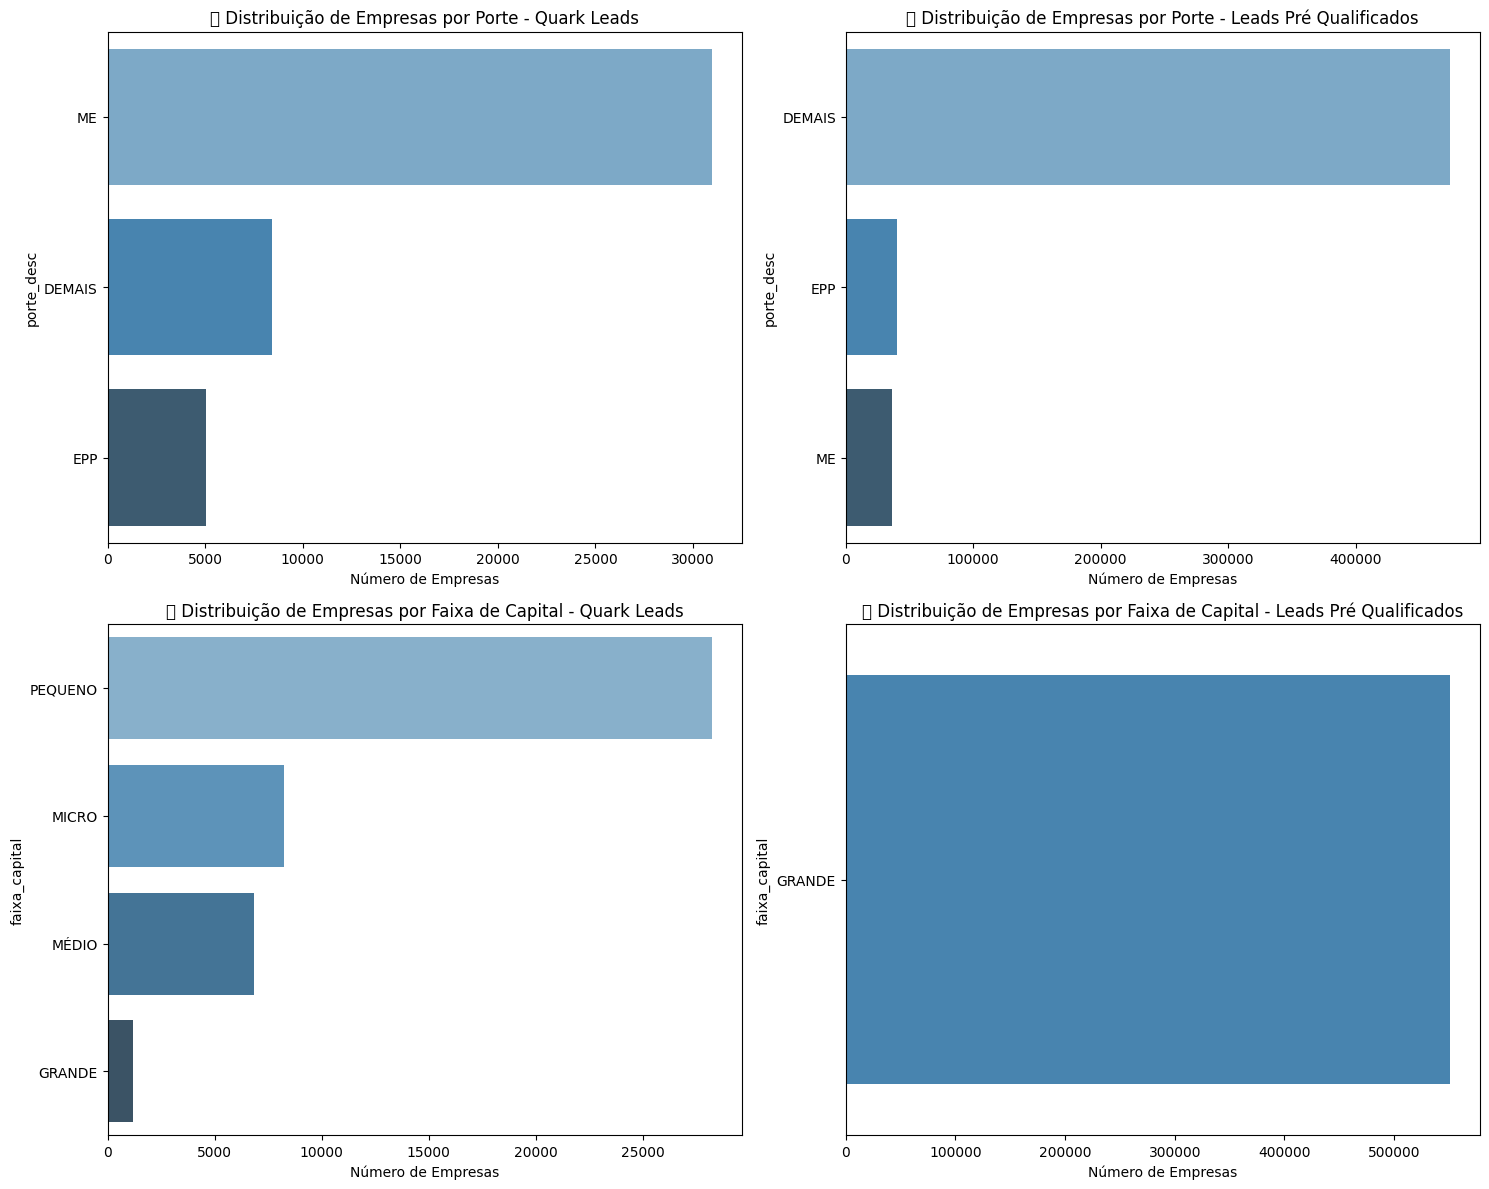

/tmp/ipykernel_442629/2692213802.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/c/Users/Erico/OneDrive/AMBIENTE EMPRESA/projetos/insightesfera/ETL/CNPJ_RECEITA/venv_etl_clean/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


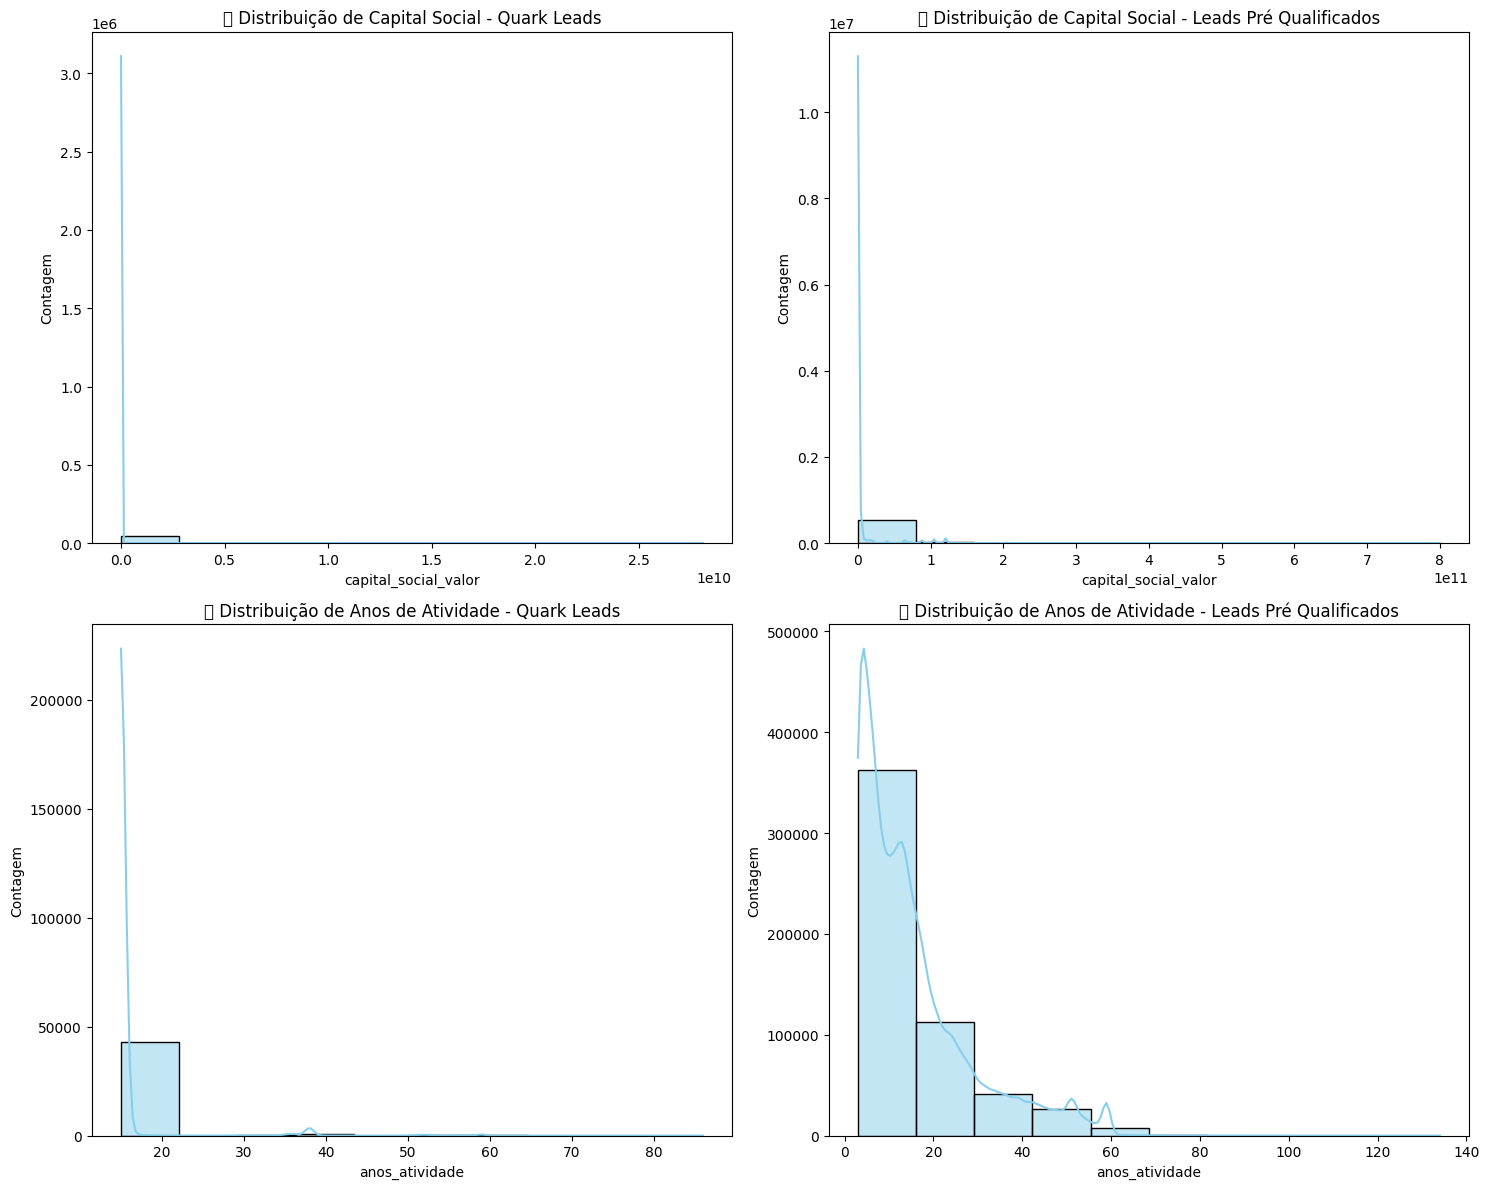

In [72]:
# Ajustar o gráfico para nova orientação: Eixo Y com número de empresas e Eixo X com as categorias
# Além disso, ajustar para manter o padrão de 2 colunas: uma para Quark Leads e outra para Leads Pré Qualificados
import seaborn as sns

# Definir a função para gerar o gráfico de barras horizontais com o número de empresas no eixo X e categorias no eixo Y
def plot_distribution(df, column, title, ax):
    distribution = df[column].value_counts().reset_index()
    distribution.columns = [column, 'Número de Empresas']
    sns.barplot(data=distribution, x='Número de Empresas', y=column, ax=ax, palette='Blues_d')
    ax.set_title(title)
    ax.set_xlabel('Número de Empresas')
    ax.set_ylabel(column)

# Criar o gráfico de barras para a base Quark Leads e Leads Pré Qualificados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico para a distribuição de Porte de Empresa
plot_distribution(quark_leads_df, 'porte_desc', "📊 Distribuição de Empresas por Porte - Quark Leads", axes[0, 0])
plot_distribution(leads_prequalificados_df, 'porte_desc', "📊 Distribuição de Empresas por Porte - Leads Pré Qualificados", axes[0, 1])

# Gráfico para a distribuição de Faixa de Capital
plot_distribution(quark_leads_df, 'faixa_capital', "📊 Distribuição de Empresas por Faixa de Capital - Quark Leads", axes[1, 0])
plot_distribution(leads_prequalificados_df, 'faixa_capital', "📊 Distribuição de Empresas por Faixa de Capital - Leads Pré Qualificados", axes[1, 1])

plt.tight_layout()
plt.show()

# 2. Gráficos de Distribuição por Bins

# Função para criar gráficos de distribuição por bins
def plot_distribution_bins(df, column, bins, title, ax):
    sns.histplot(df[column], bins=bins, kde=True, ax=ax, color='skyblue')
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel('Contagem')

# Definindo o número de bins
bins = 10

# Gráficos de distribuição por bins para Quark Leads e Leads Pré Qualificados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico para a distribuição de Faixa de Capital em bins
plot_distribution_bins(quark_leads_df, 'capital_social_valor', bins, "📊 Distribuição de Capital Social - Quark Leads", axes[0, 0])
plot_distribution_bins(leads_prequalificados_df, 'capital_social_valor', bins, "📊 Distribuição de Capital Social - Leads Pré Qualificados", axes[0, 1])

# Gráfico para a distribuição de Anos de Atividade em bins
plot_distribution_bins(quark_leads_df, 'anos_atividade', bins, "📊 Distribuição de Anos de Atividade - Quark Leads", axes[1, 0])
plot_distribution_bins(leads_prequalificados_df, 'anos_atividade', bins, "📊 Distribuição de Anos de Atividade - Leads Pré Qualificados", axes[1, 1])

plt.tight_layout()
plt.show()



### NLP Cluster descrição Cnaes base comprada x Receita alto valor

- capital social e qtd de empresas
- Base comprada mesmo após cruzamento aparece sem capital social
- Quantidade de empresas por classificação Cluster Setor CNAEs

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ericobon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


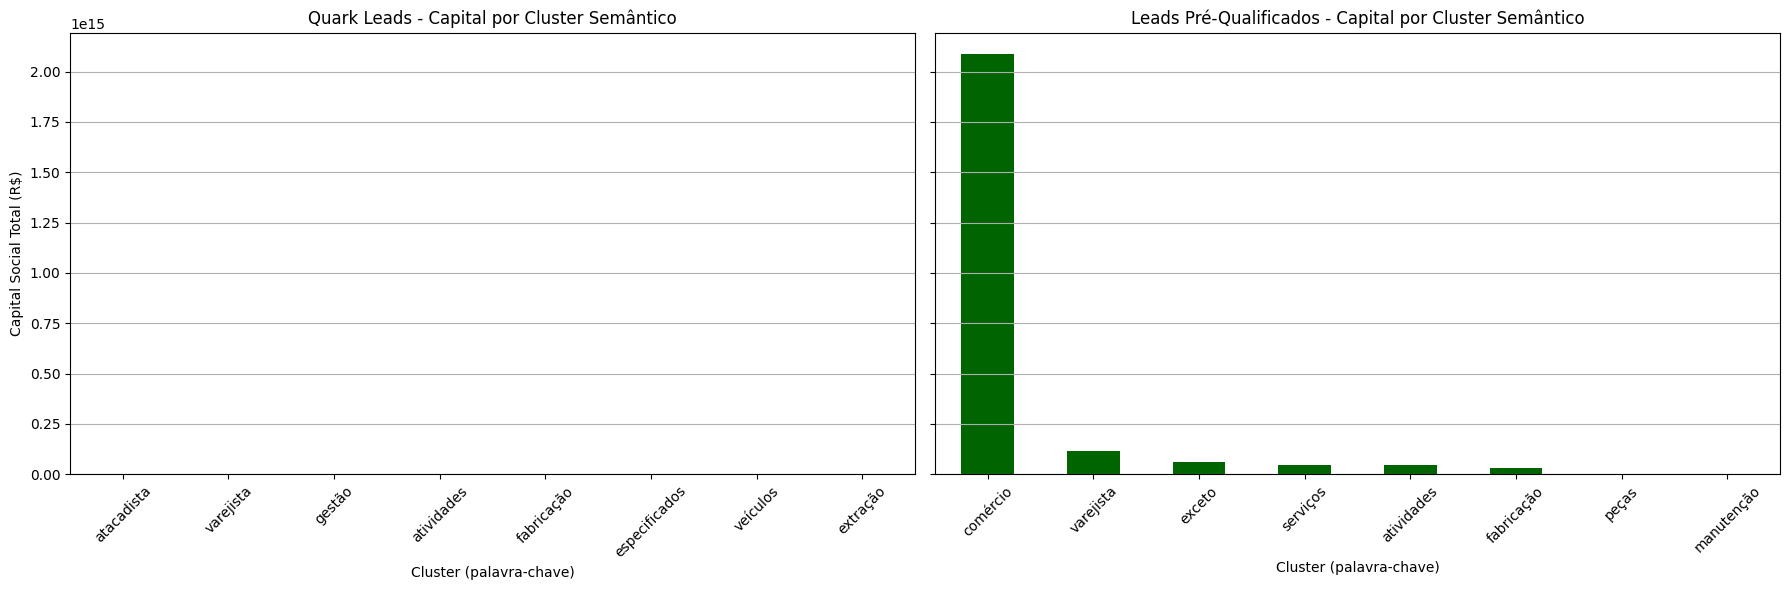

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
import numpy as np

# 1. Baixar stopwords
nltk.download('stopwords')
stopwords_pt = stopwords.words('portuguese')

# 2. Função para aplicar clusterização com rótulo semântico
def clusterizar_com_rotulo_semantico(df, coluna_desc='cnae_principal_desc', capital_col='capital_social_valor', n_clusters=8):
    descricoes = df[coluna_desc].dropna().unique()
    
    # Vetorização
    vectorizer = TfidfVectorizer(stop_words=stopwords_pt)
    X = vectorizer.fit_transform(descricoes)

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Nome dos termos por cluster
    termos = vectorizer.get_feature_names_out()
    nomes_clusters = []

    for i in range(n_clusters):
        centroide = kmeans.cluster_centers_[i]
        termo_top = termos[centroide.argmax()]
        nomes_clusters.append(termo_top)

    # Mapear CNAEs para seus clusters
    cluster_ids = [nomes_clusters[i] for i in clusters]
    cluster_map = pd.DataFrame({coluna_desc: descricoes, 'cluster_semantico': cluster_ids})

    # Evitar conflito no merge
    df = df.drop(columns=['cluster_semantico'], errors='ignore')
    df_clusterizado = df.merge(cluster_map, how='left', on=coluna_desc)

    # Agrupar por cluster e somar capital
    cluster_sum = df_clusterizado.groupby('cluster_semantico')[capital_col].sum().sort_values(ascending=False)

    return df_clusterizado, cluster_sum

# 3. Aplicar separadamente nas duas bases
quark_leads_df, quark_cluster_sum = clusterizar_com_rotulo_semantico(quark_leads_df)
leads_prequalificados_df, leads_cluster_sum = clusterizar_com_rotulo_semantico(leads_prequalificados_df)

# 4. Plotar gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

quark_cluster_sum.plot(kind='bar', ax=axes[0], color='royalblue')
axes[0].set_title('Quark Leads - Capital por Cluster Semântico')
axes[0].set_ylabel('Capital Social Total (R$)')
axes[0].set_xlabel('Cluster (palavra-chave)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, axis='y')

leads_cluster_sum.plot(kind='bar', ax=axes[1], color='darkgreen')
axes[1].set_title('Leads Pré-Qualificados - Capital por Cluster Semântico')
axes[1].set_xlabel('Cluster (palavra-chave)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, axis='y')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ericobon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


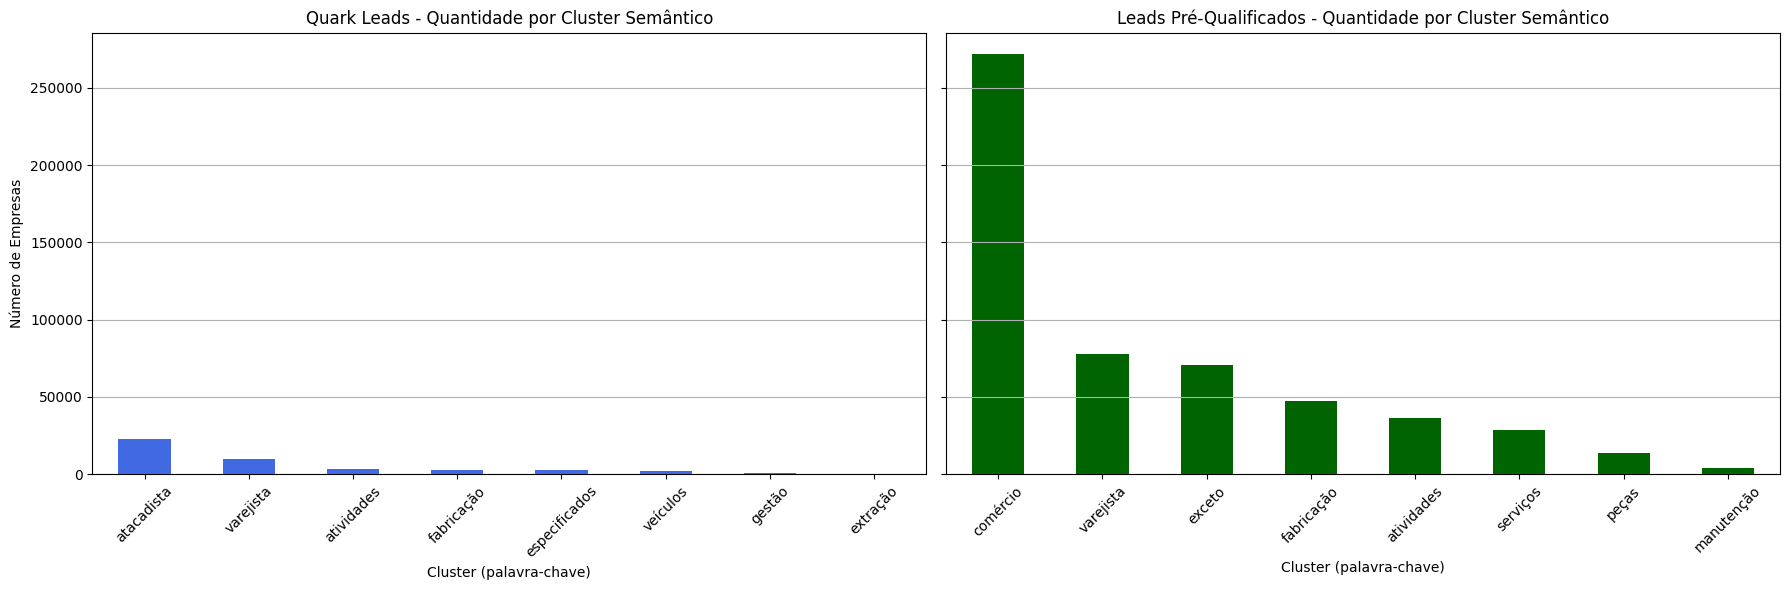

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
import numpy as np

# 1. Baixar stopwords
nltk.download('stopwords')
stopwords_pt = stopwords.words('portuguese')

# 2. Função para aplicar clusterização com rótulo semântico
def clusterizar_por_quantidade(df, coluna_desc='cnae_principal_desc', n_clusters=8):
    descricoes = df[coluna_desc].dropna().unique()
    
    # Vetorização
    vectorizer = TfidfVectorizer(stop_words=stopwords_pt)
    X = vectorizer.fit_transform(descricoes)

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Termo mais forte por cluster
    termos = vectorizer.get_feature_names_out()
    nomes_clusters = [termos[c.argmax()] for c in kmeans.cluster_centers_]

    # Mapeamento CNAE para rótulo semântico
    cluster_labels = [nomes_clusters[i] for i in clusters]
    cluster_map = pd.DataFrame({coluna_desc: descricoes, 'cluster_semantico': cluster_labels})

    # Remover coluna anterior se existir e juntar com base original
    df = df.drop(columns=['cluster_semantico'], errors='ignore')
    df_clusterizado = df.merge(cluster_map, how='left', on=coluna_desc)

    # Agrupar por quantidade de empresas por cluster
    cluster_counts = df_clusterizado.groupby('cluster_semantico').size().sort_values(ascending=False)

    return df_clusterizado, cluster_counts

# 3. Aplicar nas duas bases
quark_leads_df, quark_cluster_counts = clusterizar_por_quantidade(quark_leads_df)
leads_prequalificados_df, leads_cluster_counts = clusterizar_por_quantidade(leads_prequalificados_df)

# 4. Plotar gráfico lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

quark_cluster_counts.plot(kind='bar', ax=axes[0], color='royalblue')
axes[0].set_title('Quark Leads - Quantidade por Cluster Semântico')
axes[0].set_ylabel('Número de Empresas')
axes[0].set_xlabel('Cluster (palavra-chave)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, axis='y')

leads_cluster_counts.plot(kind='bar', ax=axes[1], color='darkgreen')
axes[1].set_title('Leads Pré-Qualificados - Quantidade por Cluster Semântico')
axes[1].set_xlabel('Cluster (palavra-chave)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, axis='y')

plt.tight_layout()
plt.show()


In [76]:
# Caminho de saída
output_dir = "quark_leads/dados_output"
os.makedirs(output_dir, exist_ok=True)  # Cria a pasta se não existir

# Caminhos dos arquivos
quark_path = os.path.join(output_dir, "quark_leads_clusterizado.csv")
prequalificados_path = os.path.join(output_dir, "leads_prequalificados_clusterizado.csv")

# Salvar os CSVs
quark_leads_df.to_csv(quark_path, index=False)
leads_prequalificados_df.to_csv(prequalificados_path, index=False)

print(f"✅ Arquivos salvos em:\n- {quark_path}\n- {prequalificados_path}")


✅ Arquivos salvos em:
- quark_leads/dados_output/quark_leads_clusterizado.csv
- quark_leads/dados_output/leads_prequalificados_clusterizado.csv
